In [19]:
import pandas as pd
# import matplotlib as plt
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt


In [4]:
unimodal_perf = pd.read_csv('../unimodal-speech/train_log_uni_speech_neg10db.csv')
unimodal_perf.head(2)

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,[0.70697314],[1.7858659905037915],[0.6651928],[1.91358424787112]
1,1,[0.8324816],[1.4028817358696406],[0.71696144],[1.7335183116324566]


In [5]:
x = np.linspace(0, len(unimodal_perf))

In [6]:
def floatify(input_str):
    return float(input_str.replace('[', '').replace(']',''))

def parse_log(input_df):
    input_df['accuracy'] = input_df.apply(lambda x: floatify(x['accuracy']), axis=1)
    input_df['val_accuracy'] = input_df.apply(lambda x: floatify(x['val_accuracy']), axis=1)
    input_df['loss'] = input_df.apply(lambda x: floatify(x['loss']), axis=1)
    input_df['val_loss'] = input_df.apply(lambda x: floatify(x['val_loss']), axis=1)
    return input_df
def plot_log(input_csv):
    temp_df = pd.read_csv(input_csv)
    out_df = parse_log(temp_df)
    sns.lineplot(data=out_df.drop(columns=['Unnamed: 0','loss','val_loss'])) 
def plot_log_formatted(input_csv):
    temp_df = pd.read_csv(input_csv)
    sns.lineplot(data=temp_df)     

In [7]:
unimodal_perf['accuracy'] = unimodal_perf.apply(lambda x: floatify(x['accuracy']), axis=1)
unimodal_perf['val_accuracy'] = unimodal_perf.apply(lambda x: floatify(x['val_accuracy']), axis=1)
unimodal_perf['loss'] = unimodal_perf.apply(lambda x: floatify(x['loss']), axis=1)
unimodal_perf['val_loss'] = unimodal_perf.apply(lambda x: floatify(x['val_loss']), axis=1)

Text(0.5, 1.0, 'Unimodal Speech -10dB SNR')

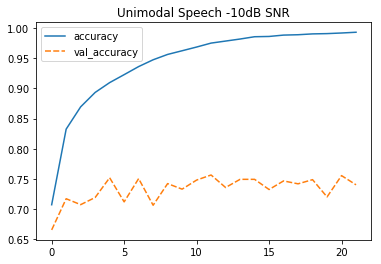

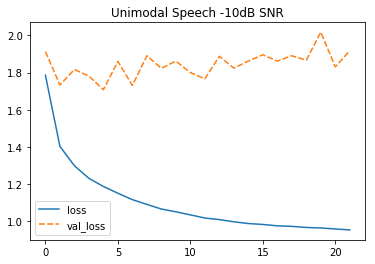

In [22]:
sns.lineplot(data=unimodal_perf.drop(columns=['Unnamed: 0','loss','val_loss']))
plt.title("Unimodal Speech -10dB SNR") # You can comment this line out if you don't need title
fig1, ax1 = plt.subplots()
sns.lineplot(data=unimodal_perf.drop(columns=['Unnamed: 0','accuracy','val_accuracy']))
plt.title("Unimodal Speech -10dB SNR") # You can comment this line out if you don't need title


In [28]:
def generate_plot(input_csv=None,input_title=None):
    result_df = pd.read_csv(input_csv)
    
    x = np.linspace(0, len(result_df))
    
    result_df['accuracy'] = result_df.apply(lambda x: floatify(x['accuracy']), axis=1)
    result_df['val_accuracy'] = result_df.apply(lambda x: floatify(x['val_accuracy']), axis=1)
    result_df['loss'] = result_df.apply(lambda x: floatify(x['loss']), axis=1)
    result_df['val_loss'] = result_df.apply(lambda x: floatify(x['val_loss']), axis=1)    
    
    sns.lineplot(data=result_df.drop(columns=['Unnamed: 0','loss','val_loss']))
    plt.title(input_title) # You can comment this line out if you don't need title
    fig1, ax1 = plt.subplots()
    sns.lineplot(data=result_df.drop(columns=['Unnamed: 0','accuracy','val_accuracy']))
    plt.title(input_title) # You can comment this line out if you don't need title
    
    

In [63]:
def generate_plot(input_csv=None,input_title=None,n_len = None):
    result_df = pd.read_csv(input_csv)
    
    result_df['accuracy'] = result_df.apply(lambda x: floatify(x['accuracy']), axis=1)
    result_df['val_accuracy'] = result_df.apply(lambda x: floatify(x['val_accuracy']), axis=1)
    result_df['loss'] = result_df.apply(lambda x: floatify(x['loss']), axis=1)
    result_df['val_loss'] = result_df.apply(lambda x: floatify(x['val_loss']), axis=1)    

    if n_len is not None:
        
        x = np.linspace(0, n_len)
        temp_df = result_df.head(n_len)
        fig1, ax1 = plt.subplots(figsize=(8,8))
        sns.lineplot(data=temp_df.drop(columns=['Unnamed: 0','loss','val_loss']))
        plt.title(input_title) # You can comment this line out if you don't need title
        fig1, ax1 = plt.subplots(figsize=(8,8))
        sns.lineplot(data=temp_df.drop(columns=['Unnamed: 0','accuracy','val_accuracy']))
        plt.title(input_title) # You can comment this line out if you don't need title

    else:
        x = np.linspace(0, len(result_df))
        fig1, ax1 = plt.subplots(figsize=(8,8))
        sns.lineplot(data=result_df.drop(columns=['Unnamed: 0','loss','val_loss']))
        plt.title(input_title) # You can comment this line out if you don't need title
        fig1, ax1 = plt.subplots(figsize=(8,8))
        sns.lineplot(data=result_df.drop(columns=['Unnamed: 0','accuracy','val_accuracy']))
        plt.title(input_title) # You can comment this line out if you don't need title
        
    print(result_df[result_df.val_accuracy == result_df.val_accuracy.max()])
    return result_df


## Plot for Unimodal Speech -10dB SNR

    Unnamed: 0  accuracy      loss  val_accuracy  val_loss
11          11  0.975293  1.017437      0.756359  1.766563


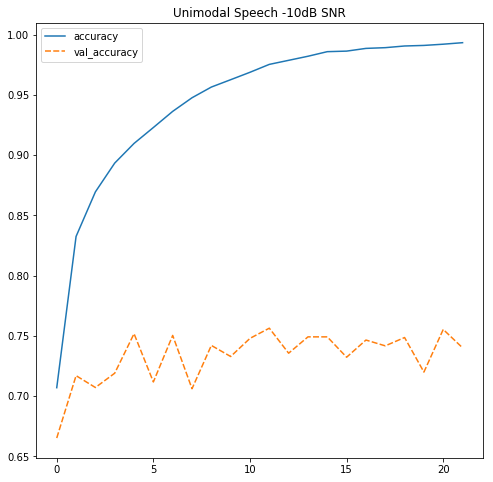

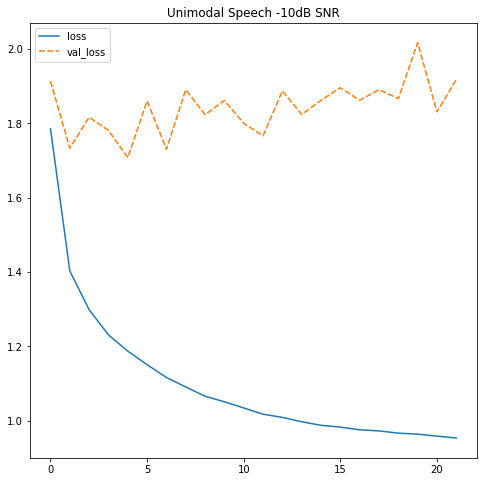

In [64]:
temp_df = generate_plot('../unimodal-speech/train_log_uni_speech_neg10db.csv',input_title="Unimodal Speech -10dB SNR")

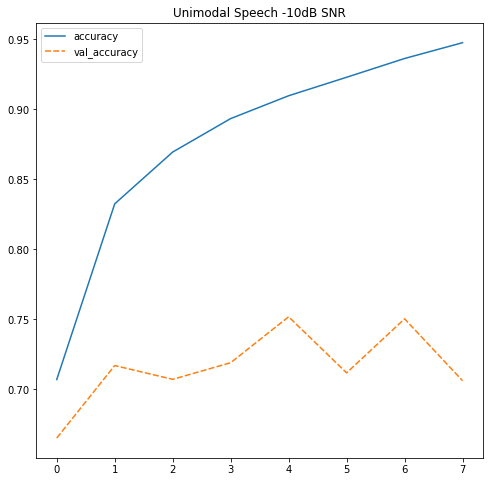

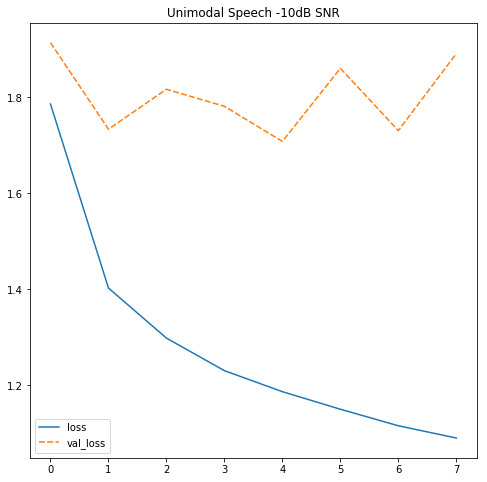

In [52]:
generate_plot('../unimodal-speech/train_log_uni_speech_neg10db.csv',input_title="Unimodal Speech -10dB SNR",n_len = 8)

## Unimodal Speech -20dB SNR

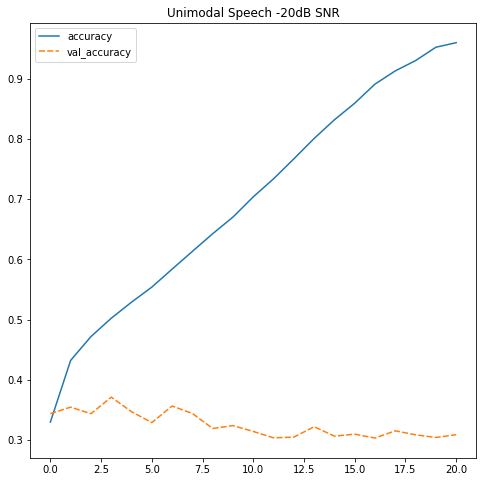

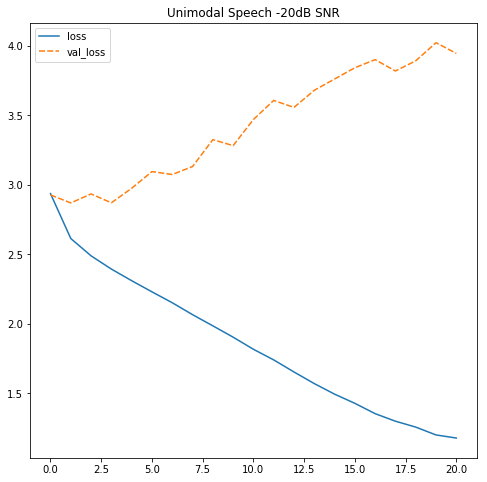

In [53]:
generate_plot('../unimodal-speech/train_log_uni_speech_neg20db.csv',input_title="Unimodal Speech -20dB SNR")

## Unimodal Image 

In [7]:
unimodal_perf = pd.read_csv('unimodal-image/hub/examples/colab/train_log_77long_imggrid.csv')
unimodal_perf.head(60)


,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,[0.84007245],[1.3919412993940008],[0.6175477],[2.1874444913030238]
1,1,[0.8506276],[1.3655713736762554],[0.61600757],[2.2156805815871077]
2,2,[0.8552168],[1.3469845555940065],[0.56036365],[2.498903091647477]
3,3,[0.86030215],[1.332457965554451],[0.5649841],[2.4291715930868976]
4,4,[0.86386186],[1.3212404497844592],[0.6183426],[2.179466333127742]
5,5,[0.86682624],[1.3083940957552573],[0.5942965],[2.3752454024619634]
6,6,[0.87238294],[1.294475185892416],[0.5819257],[2.421092310846326]
7,7,[0.8773442],[1.283118341195723],[0.62013113],[2.183129521924854]
8,8,[0.8768853],[1.2777829751960814],[0.5669217],[2.469495321305643]
9,9,[0.88089156],[1.2661356916028277],[0.59076905],[2.352543223643341]


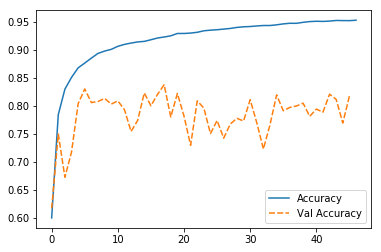

In [4]:
plot_log_formatted('bimodal/results_bimodal_earlystage.csv')

In [5]:
bimodal_df = pd.read_csv('bimodal/results_bimodal_earlystage.csv')

In [6]:
bimodal_df

,Accuracy,Val Accuracy
0,0.600077,0.617051
1,0.784281,0.749752
2,0.829712,0.672595
3,0.850796,0.717458
4,0.867751,0.803756
5,0.876308,0.830137
6,0.885152,0.805843
7,0.893511,0.807731
8,0.897703,0.813295
9,0.900729,0.803110


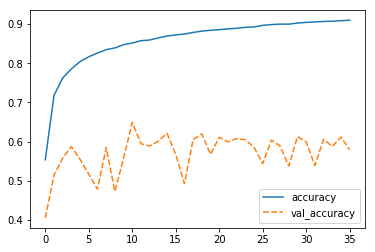

In [8]:
plot_log('unimodal-image/hub/examples/colab/train_log_unimodal_img.csv')

In [9]:
unimodal_df = pd.read_csv('unimodal-image/hub/examples/colab/train_log_unimodal_img.csv')
unimodal_df

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,[0.55359447],[2.266881252428113],[0.40505764],[2.8869364164023406]
1,1,[0.71801203],[1.761465558316836],[0.51460654],[2.7140464119388112]
2,2,[0.7625025],[1.6276606853861353],[0.55763113],[2.501318402055337]
3,3,[0.7857834],[1.5584295086265438],[0.5873907],[2.3179060049201046]
4,4,[0.8044255],[1.5055743226174159],[0.55435216],[2.4485786796942803]
5,5,[0.8167171],[1.4674867340013322],[0.5166932],[2.5492306885165896]
6,6,[0.82615596],[1.4380089171137642],[0.47853735],[2.8415704360068887]
7,7,[0.83485067],[1.4122568195503509],[0.5844098],[2.3067880758041417]
8,8,[0.8393282],[1.3933557500960358],[0.4732214],[2.828102326734267]
9,9,[0.84760123],[1.371615227500369],[0.55688596],[2.4942013348418692]


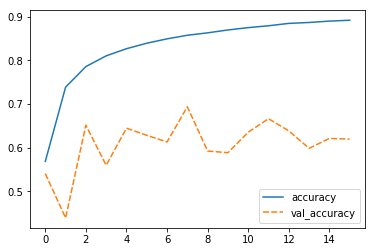

In [4]:
plot_log('bimodal/train_bimodal_early_n10db_log.csv')

In [33]:
temp = unimodal_perf.head(10)

In [34]:
temp

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.706973,1.785866,0.665193,1.913584
1,1,0.832482,1.402882,0.716961,1.733518
2,2,0.869481,1.298679,0.707124,1.816598
3,3,0.893382,1.230873,0.718998,1.781149
4,4,0.909692,1.187147,0.751789,1.708056
5,5,0.922901,1.150614,0.711745,1.860311
6,6,0.936297,1.116181,0.750348,1.730578
7,7,0.947596,1.090641,0.706131,1.890755
8,8,0.956477,1.065722,0.742051,1.823438
9,9,0.962579,1.050816,0.732860,1.861666


In [36]:
unimodal_perf

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.706973,1.785866,0.665193,1.913584
1,1,0.832482,1.402882,0.716961,1.733518
2,2,0.869481,1.298679,0.707124,1.816598
3,3,0.893382,1.230873,0.718998,1.781149
4,4,0.909692,1.187147,0.751789,1.708056
5,5,0.922901,1.150614,0.711745,1.860311
6,6,0.936297,1.116181,0.750348,1.730578
7,7,0.947596,1.090641,0.706131,1.890755
8,8,0.956477,1.065722,0.742051,1.823438
9,9,0.962579,1.050816,0.732860,1.861666
